In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

# Load data
df = pd.read_csv('worldcoin-org_2023-07-24_2024-09-20.csv')
df['Date'] = pd.to_datetime(df['Start'])
df.set_index('Date', inplace=True)


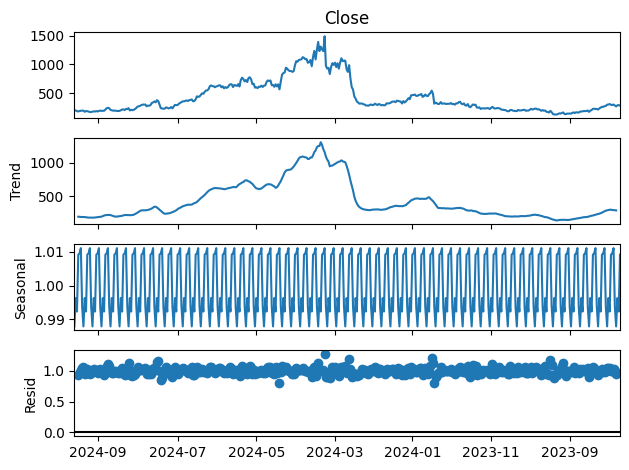

In [2]:
# Decompose the time series
result = seasonal_decompose(df['Close'], model='multiplicative')
result.plot()
plt.show()


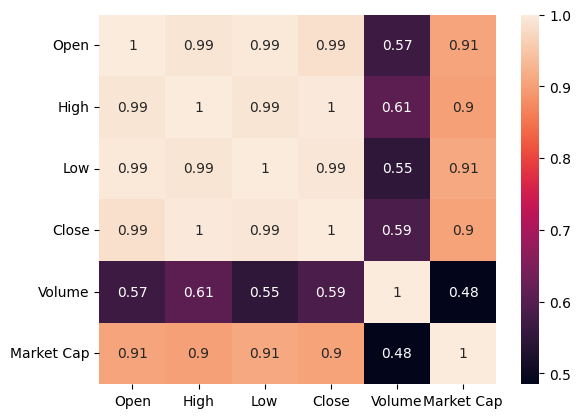

In [3]:
correlation = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']].corr()
sns.heatmap(correlation, annot=True)
plt.show()


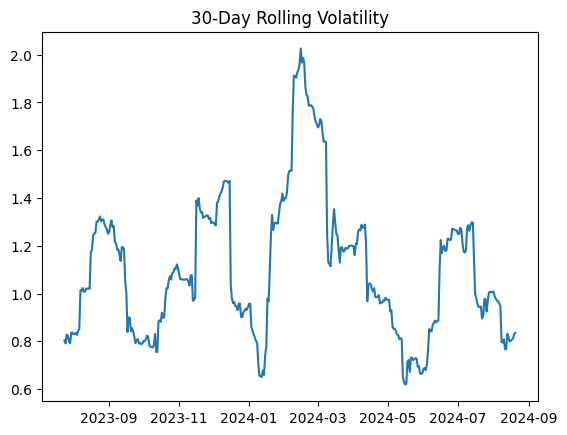

In [4]:
df['Returns'] = df['Close'].pct_change()
df['Volatility'] = df['Returns'].rolling(window=30).std() * np.sqrt(252)
plt.plot(df.index, df['Volatility'])
plt.title('30-Day Rolling Volatility')
plt.show()


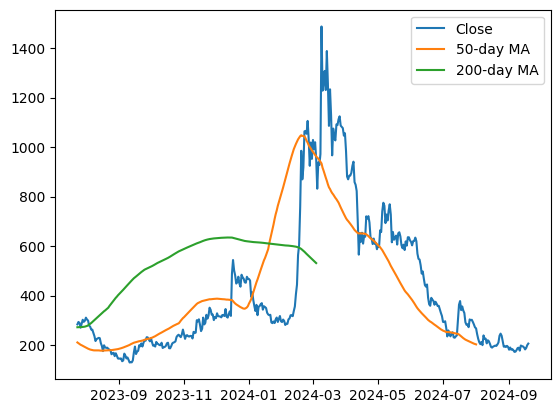

In [5]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['MA50'], label='50-day MA')
plt.plot(df.index, df['MA200'], label='200-day MA')
plt.legend()
plt.show()


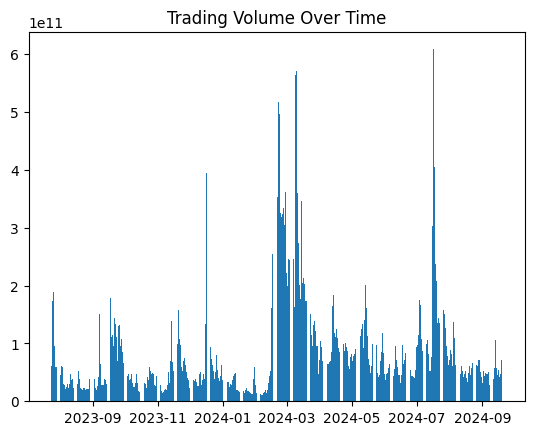

In [6]:
plt.bar(df.index, df['Volume'])
plt.title('Trading Volume Over Time')
plt.show()


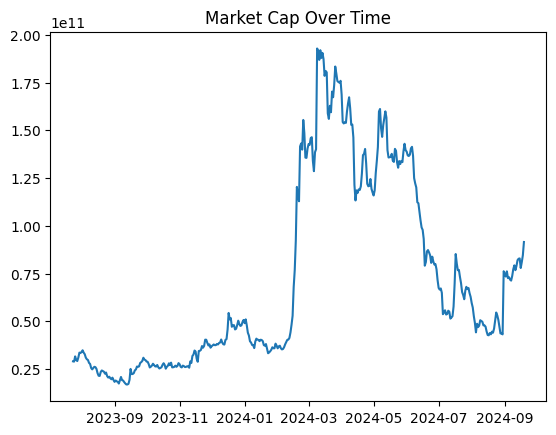

In [7]:
plt.plot(df.index, df['Market Cap'])
plt.title('Market Cap Over Time')
plt.show()


In [8]:
# Prepare data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']])

# Create sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), :])
        y.append(data[i + seq_length, 3])  # Predicting Close price
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(scaled_data, seq_length)

# Split data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build and train model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(seq_length, 6)),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Make predictions
predictions = model.predict(X_test)


Epoch 1/50
9/9 [==============================] - 2s 64ms/step - loss: 0.0481 - val_loss: 6.8813e-04
Epoch 2/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0089 - val_loss: 0.0019
Epoch 3/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0044 - val_loss: 2.8861e-04
Epoch 4/50
9/9 [==============================] - 0s 16ms/step - loss: 0.0041 - val_loss: 2.5780e-04
Epoch 5/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0028 - val_loss: 6.4506e-04
Epoch 6/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0024 - val_loss: 3.0580e-04
Epoch 7/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0022 - val_loss: 1.1662e-04
Epoch 8/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0020 - val_loss: 1.2374e-04
Epoch 9/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0020 - val_loss: 1.0367e-04
Epoch 10/50
9/9 [==============================] - 0s 17ms/step - loss: 0.0019 - val_loss: 1.12